In [188]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style()
%matplotlib inline

# NYC

In [189]:
def build_df(city, date_range):
    dfs = []
    for year in date_range:
        df = pd.read_csv('{}/{}-summarized.csv'.format(city, year))
        df['year'] = year
        dfs.append(df)
    return pd.concat(dfs).fillna(0)

In [190]:
nyc_df = build_df('nyc', range(2012, 2017))
nyc_df.head()

,AGENCY,APPLIANCE,Adopt-A-Basket,Advocate - Other,Advocate - RPIE,Advocate-Business Tax,Advocate-Co-opCondo Abatement,Advocate-Commercial Exemptions,Advocate-Personal Exemptions,Advocate-Prop Class Incorrect,...,WATER LEAK,Water Conservation,Water Quality,Water System,Weatherization,Window Guard,X-Ray Machine/Equipment,price,year,zipcode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175308.333333,2012,14450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137708.333333,2012,29601
2,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,11.0,345.0,0.0,0.0,0.0,110533.333333,2012,10462
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,306575.000000,2012,10703
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,394108.333333,2012,11710


In [191]:
complaints = nyc_df.drop(['price', 'year', 'zipcode'], axis=1)
nyc_df['total_complaints'] = complaints.sum(1)

In [192]:
nyc_X = nyc_df.drop(['price', 'year', 'zipcode'], 1)
nyc_columns = nyc_X.columns
nyc_X = np.array(nyc_X)
nyc_y = np.array(nyc_df.loc[:, 'price'])

In [193]:
def evaluate_regressor(regressor, X, y):
    kf = KFold(10)

    mse = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx, :], X[test_idx, :]
        y_train, y_test = y[train_idx], y[test_idx]
        regressor.fit(X_train, y_train)
        predictions = regressor.predict(X_test)
        mse.append(mean_absolute_error(y_test, predictions))
    
    print('Average MSE: {}'.format(sum(mse) / len(mse)))
    #return regressor, sum(mse) / len(mse), mse

In [194]:
from sklearn.feature_selection import SelectKBest, f_regression

In [195]:
kbest = SelectKBest(f_regression, 50)
#X = kbest.fit_transform(nyc_X, nyc_y)
#nyc_columns = nyc_columns[kbest.get_support()]
X = nyc_X
y = nyc_y

In [196]:
random_forest = RandomForestRegressor(n_estimators=100, n_jobs=-1)
ada = AdaBoostRegressor()
grad = GradientBoostingRegressor()
ridge = Ridge(1e-3, normalize=True, max_iter=10000)
lasso = Lasso(1e-3, normalize=True, max_iter=10000)

evaluate_regressor(random_forest,X,y)
evaluate_regressor(ada,X,y)
evaluate_regressor(grad,X,y)
evaluate_regressor(ridge,X,y)
evaluate_regressor(lasso,X,y)

Average MSE: 128981.1205646792
Average MSE: 248148.86650398228
Average MSE: 128033.211992461
Average MSE: 202519.03365149157


/home/sam/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Average MSE: 204283.393540045


In [197]:
def important_features(coeffs, n):
    idx = np.argsort(-abs(coeffs))[:n]
    for i in idx:
        print("Parameter: '{}' had an effect of size: {}".format(nyc_columns[i], coeffs[i]))

In [198]:
important_features(random_forest.feature_importances_, 10)

Parameter: 'EAP Inspection - F59' had an effect of size: 0.2679075617266545
Parameter: 'Taxi Complaint' had an effect of size: 0.22185698816712418
Parameter: 'Noise' had an effect of size: 0.05365448616301812
Parameter: 'Traffic' had an effect of size: 0.0486291200070852
Parameter: 'ELECTRIC' had an effect of size: 0.03304108138206814
Parameter: 'total_complaints' had an effect of size: 0.029819493923828686
Parameter: 'Consumer Complaint' had an effect of size: 0.02143817667215063
Parameter: 'DOF Parking - Tax Exemption' had an effect of size: 0.02090475333902773
Parameter: 'Taxi Report' had an effect of size: 0.018744573010512328
Parameter: 'Fire Safety Director - F58' had an effect of size: 0.017265517891927068


In [199]:
important_features(grad.feature_importances_, 10)

Parameter: 'Consumer Complaint' had an effect of size: 0.0700091340000471
Parameter: 'Taxi Complaint' had an effect of size: 0.055984199954920266
Parameter: 'Taxi Report' had an effect of size: 0.04881870249596333
Parameter: 'For Hire Vehicle Report' had an effect of size: 0.03351219757570009
Parameter: 'Found Property' had an effect of size: 0.0318022431894867
Parameter: 'ELECTRIC' had an effect of size: 0.03139606912284433
Parameter: 'DOF Parking - Tax Exemption' had an effect of size: 0.03074403839381417
Parameter: 'Housing Options' had an effect of size: 0.030332682086798613
Parameter: 'Noise' had an effect of size: 0.025974347317166614
Parameter: 'total_complaints' had an effect of size: 0.02566609562882687


# LA

In [200]:
la_df = build_df('la', range(2011, 2016))
la_df.head()

,City Administrative Officer,City Attorney's Office,City Ethics Commission,Community Redevelopment Agency,Council District 01,Council District 02,Council District 03,Council District 04,Council District 05,Council District 06,...,PW/Board of Public Works,PW/Bureau of Contract Administration,PW/Bureau of Engineering,PW/Bureau of Sanitation,PW/Bureau of Street Lighting,PW/Bureau of Street Services,Personnel Department,price,year,zipcode
0,2.0,40.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,...,918.0,7.0,26.0,2890.0,601.0,730.0,18.0,556266.666667,2011,90019
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,319333.333333,2011,75039
2,2.0,15.0,0.0,1.0,0.0,1.0,24.0,0.0,1.0,0.0,...,89.0,5.0,36.0,1078.0,163.0,458.0,2.0,484600.000000,2011,91367
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145500.000000,2011,33569
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175016.666667,2011,14450


In [201]:
complaints = la_df.drop(['price', 'year', 'zipcode'], axis=1)
la_df['total_complaints'] = complaints.sum(1)

In [202]:
la_X = la_df.drop(['price', 'year', 'zipcode'], 1)
la_columns = la_X.columns
la_X = np.array(la_X)
la_y = np.array(la_df.loc[:, 'price'])

In [203]:
random_forest = RandomForestRegressor(n_estimators=100, n_jobs=-1)
ada = AdaBoostRegressor(n_estimators=100)
grad = GradientBoostingRegressor(n_estimators=100)
ridge = Ridge(0.1, normalize=True, max_iter=10000)
lasso = Lasso(0.1, normalize=True, max_iter=10000)

evaluate_regressor(random_forest,la_X, la_y)
evaluate_regressor(ada, la_X, la_y)
evaluate_regressor(grad, la_X, la_y)
evaluate_regressor(ridge, la_X, la_y)
evaluate_regressor(lasso, la_X, la_y)

Average MSE: 196061.71044047733
Average MSE: 401844.69529769185
Average MSE: 188903.29111183318
Average MSE: 212291.70570944896


/home/sam/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Average MSE: 214949.7311342499


In [204]:
important_features(random_forest.feature_importances_, 10)

Parameter: 'Asbestos/Garbage Nuisance' had an effect of size: 0.19187235841951128
Parameter: 'DOF Property - Update Account' had an effect of size: 0.10320732577654203
Parameter: 'Consumer Complaint' had an effect of size: 0.05898932512782488
Parameter: 'Construction' had an effect of size: 0.04924746133757397
Parameter: 'Agency Issues' had an effect of size: 0.0463300936777556
Parameter: 'DHS Advantage -Landlord/Broker' had an effect of size: 0.04458003562464866
Parameter: 'Advocate-Personal Exemptions' had an effect of size: 0.044257173917013344
Parameter: 'Bus Stop Shelter Placement' had an effect of size: 0.04073496092857267
Parameter: 'DOF Property - Property Value' had an effect of size: 0.037696216040929015
Parameter: 'BEST/Site Safety' had an effect of size: 0.031553830271551314


In [205]:
important_features(grad.feature_importances_, 10)

Parameter: 'Asbestos/Garbage Nuisance' had an effect of size: 0.09361936514176927
Parameter: 'Construction' had an effect of size: 0.09040697305081313
Parameter: 'BEST/Site Safety' had an effect of size: 0.08271777846712419
Parameter: 'DHS Advantage -Landlord/Broker' had an effect of size: 0.0623289309056054
Parameter: 'Agency Issues' had an effect of size: 0.05445178289167641
Parameter: 'DOF Property - City Rebate' had an effect of size: 0.04658663206514684
Parameter: 'DOF Property - Update Account' had an effect of size: 0.04401726367042267
Parameter: 'Bike/Roller/Skate Chronic' had an effect of size: 0.04355293936893787
Parameter: 'Advocate-Commercial Exemptions' had an effect of size: 0.04302522777431728
Parameter: 'DOF Property - Request Copy' had an effect of size: 0.03906911045343461


In [206]:
from sklearn.decomposition import PCA, FastICA

In [207]:
pca = PCA(10)
pca_X = pca.fit_transform(la_X)

ica = FastICA(10)
ica_X = ica.fit_transform(la_X)

In [208]:
random_forest = RandomForestRegressor(n_estimators=100, n_jobs=-1)

evaluate_regressor(random_forest, pca_X, la_y)
evaluate_regressor(random_forest, ica_X, la_y)

Average MSE: 200756.7884868579
Average MSE: 203160.16611893493


In [209]:
la_complaints = la_df.loc[:, ['total_complaints', 'price']]
nyc_complaints = nyc_df.loc[:, ['total_complaints', 'price']]

total_complaints = pd.concat([la_complaints, nyc_complaints])
total_complaints.rename(columns={'total_complaints': 'num_complaints'}, inplace=True)

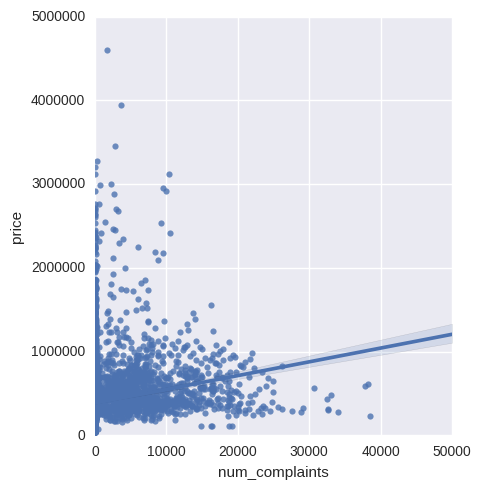

In [210]:
g = sns.lmplot(x='num_complaints', y='price', data=total_complaints, x_jitter=0.5, y_jitter=0.5)
g.set(xlim=(0,None), ylim=(0,None))
g

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [212]:
linear = LinearRegression()
X = np.array(total_complaints['num_complaints']).reshape(-1,1)
y = np.array(total_complaints['price']).reshape(-1,1)
linear.fit(X, y)
print("Effect Size: {}".format(linear.coef_[0,0]))
print("p-value: {}".format(f_regression(X, y.ravel())[1][0]))
print("R2 Score: {}".format(r2_score(y, linear.predict(X))))

Effect Size: 16.439693707799627
p-value: 3.585609328853598e-54
R2 Score: 0.029865471746300387


# Conclusion

In summary, the following points have been observed:

1. 311 data alone is no wear near descriptive enough to capture/predict the housing market. All regressors tested performed inadequately for predicting the housing market of a zipcode, with mean absolute error for NYC at around $120,000 dollars and LA at around $190,000. Predicting the housing market is a complicated task with millions of dollars poored into attempting to find a good model by industry.

2. The best performing regressors for both cities were Random Forest Regressors and Gradient Boosted Regressors, both of them decision-tree based ensemble regressors. For each city, I printed out the top 10 most important independent variables for the prediction for each of these methods. Both regressors got similar results although their order differs. For NYC noise, taxi complaints, electric issues, and the overall number of complaints were some of the most important features. For LA asbestos, construction, and safety issues were the most important.

3. Finally, a linear model based on only the total number of complaints for both cities was created to determine the correlation between number of yearly complaints and price, as well as a scatter plot with fit curve to show the correlation visually. As you can see from this, the scatter plot has a lot of outliers and the R2 score for the model is a poor 0.03, showing that once again that only looking at this one feature produces a model with very high bias. However, the measured effect size that number of complaints had in this linear model was 16.44 with a statistically significant p-value of 3.59e-54. This means that our model found out that each complaint is correlated with an increase in real estate value by $16.44. This supports the idea we had that in more expensive locations, people are more likely to complain and file 311 reports.

4. Going along with the above, it does not appear possible to pay more in order to live in a zip code with less 311 reports. In fact, by our model it would appear that the opposite it true, but this again is probably due to people in poorer areas filing less reports about issues in the first place.